# Overview

<img src="https://i.postimg.cc/0QXGghmB/RCB-banner-0000.png" width=1800px>

Acute lymphocytic leukemia (ALL) is a type of cancer of the blood and bone marrow (the spongy tissue inside bones where blood cells are made).

Acute lymphocytic leukemia is the most common type of cancer in children, and treatments result in a good chance for a cure. Acute lymphocytic leukemia can also occur in adults, though the chance of a cure is greatly reduced.

### Causes
Acute lymphocytic leukemia occurs when a bone marrow cell develops changes (mutations) in its genetic material or DNA. A cell's DNA contains the instructions that tell a cell what to do. Normally, the DNA tells the cell to grow at a set rate and to die at a set time. In acute lymphocytic leukemia, the mutations tell the bone marrow cell to continue growing and dividing.

When this happens, blood cell production becomes out of control. The bone marrow produces immature cells that develop into leukemic white blood cells called lymphoblasts. These abnormal cells are unable to function properly, and they can build up and crowd out healthy cells.

### ALL Subtypes
Doctors classify acute lymphoblastic leukemia (ALL) into subtypes by using various tests. It's important to get an accurate diagnosis since your subtype plays a large part in deciding the type of treatment you'll receive. Depending on your ALL subtype, the doctor will determine

+ The type of drug combination needed for your treatment
+ The length of time you'll need to be in treatment
+ Other types of treatment that may be needed to achieve the best outcomes

Based on immunophenotyping of the leukemia cell, the World Health Organization (WHO) classifies ALL into two main subtypes.

+ **B-cell lymphoblastic leukemia/lymphoma**: This subtype begins in immature cells that would normally develop into B-cell lymphocytes. This is the most common ALL subtype. Among adults, B-cell lineage represents 75 percent of cases.
+ **T-cell lymphoblastic leukemia**: This subtype of ALL originates in immature cells that would normally develop into T-cell lymphocytes. This subtype is less common, and it occurs more often in adults than in children. Among adults, T-cell lineage represents about 25 percent of cases.

<img src="https://i.postimg.cc/Nf9YmT0h/Origin-of-different-subtypes-of-blood-cancer-red-with-respective-associated-cell-types.png" width=500px>

The final task of the lymphocytes (B cells) developed in the bone marrow (BM) is the production of antigen-specific immunoglobulins (IGS), which function as antibodies. IGS are proteins secreted by or present on the surface of B cells, assembled from identical pairs of heavy (H) and light (L) chains.

Antibody structure<br>
<img src="https://i.postimg.cc/J7gCrn5p/antibody-structure-figure-4.png" width=400px>


Before being capable of producing Ag-specific IGS, B cells must undergo a number of transformations, first in the BM and subsequently in the lymph nodes (LNs). The first stages of B-cell development occur in the BM, where pro-B cells first rearrange the Ig H chain gene to become pre-B cells. Pre-B cells continue this somatic recombination process by rearranging the L chain to become immature B cells, expressing IgM on their surface.

B-cell development<br>
<img src="https://i.postimg.cc/NMzSjJmK/3-s2-0-B9780123742797090196-f09019-01-9780123742797.jpg" width=600px>

### About the dataset

In this project I used the following dataset: [Blood cell cancer all 4 class](https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class)

You can download this dataset with the following code:


The images of this dataset were prepared in the bone marrow laboratory of Taleqani Hospital (Tehran, Iran).

This dataset consisted of **3242 PBS images** from 89 patients suspected of ALL, whose blood samples were prepared and stained by skilled laboratory staff. This dataset is divided into two classes *benign* and *malignant*. The former comprises hematogenous, and the latter is the ALL group with three subtypes of malignant lymphoblasts: **Early Pre-B**, **Pre-B**, and **Pro-B ALL**.

All the images were taken by using a Zeiss camera in a microscope with a 100x magnification and saved as JPG files. A specialist using the flow cytometry tool made the definitive determination of the types and subtypes of these cells.

Source : https://www.kaggle.com/code/nirmalgaud/blood-cells-cancer-all-classification

# Data processing

In [ ]:
! pip install opendatasets

import opendatasets as od

od.download ("https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class/data")

# asifhassan2002

Skipping, found downloaded files in "./blood-cell-cancer-all-4class" (use force=True to force download)


In [ ]:
BASE_PATH = "/content/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]"
IMAGE_SIZE = (224,224)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle

In [ ]:
def get_image_labels(base_path):

    image_paths =[]
    labels = []

    class_dict = {class_name: label for label , class_name in enumerate(sorted(os.listdir(base_path)))}

    for class_name, label in class_dict.items():
        image_folder = os.path.join(base_path,class_name)
        for image_path in os.listdir(image_folder):
            image_paths.append(os.path.join(image_folder,image_path))
            labels.append(label)

    return image_paths, labels, class_dict


In [ ]:
image_paths, labels, class_dict = get_image_labels(BASE_PATH)

inv_class_dict = {v: k for k, v in class_dict.items()}

print(f"Total Image:{len(image_paths)}")
print(f"Class: {class_dict}")
print(f"Label: {inv_class_dict}")

Total Image:3242
Class: {'Benign': 0, '[Malignant] Pre-B': 1, '[Malignant] Pro-B': 2, '[Malignant] early Pre-B': 3}
Label: {0: 'Benign', 1: '[Malignant] Pre-B', 2: '[Malignant] Pro-B', 3: '[Malignant] early Pre-B'}


## EDA: Visualization of the image dataset

In [ ]:
def plot_images_by_label(image_paths, labels, inv_class_dict):
    """Plots 4 images of each label in a row."""

    unique_labels = sorted(list(set(labels)))
    num_labels = len(unique_labels)

    fig, axes = plt.subplots(num_labels, 4, figsize=(20, 4 * num_labels))

    for label_index, label in enumerate(unique_labels):
        label_image_indices = [i for i, l in enumerate(labels) if l == label]

        for plot_index in range(4):  # Plot 4 images per label
            if plot_index < len(label_image_indices):
                image_index = label_image_indices[plot_index]
                image_path = image_paths[image_index]
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[label_index, plot_index].imshow(img)
                axes[label_index, plot_index].set_title(inv_class_dict[label])
                axes[label_index, plot_index].axis('off')
            else:
                axes[label_index, plot_index].axis('off')
    plt.tight_layout()
    plt.show()

plot_images_by_label(image_paths, labels, inv_class_dict)


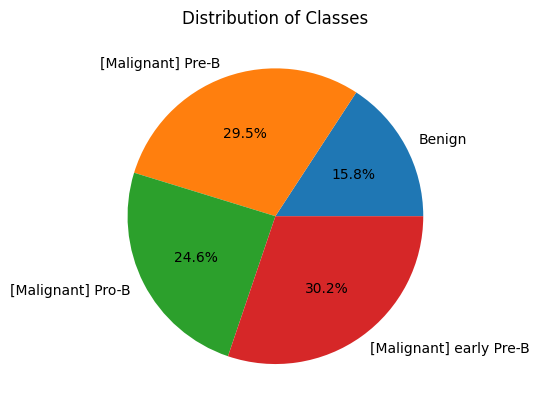

In [ ]:
plt.pie( [labels.count(i) for i in range(len(class_dict))],

        labels=[inv_class_dict[i] for i in range(len(class_dict))],

        autopct='%1.1f%%',

          )
plt.title('Distribution of Classes')
plt.show()

## Image to Data

In [ ]:
def get_img_data(paths,labels):
    img_data = []
    img_labels = []

    for path, label in zip(paths,labels):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMAGE_SIZE)
        img_data.append(img)
        img_labels.append(label)

    return np.array(img_data), np.array(img_labels)


In [ ]:
img_data ,  img_labels = get_img_data(image_paths,labels)

print(f"Shape of image data: {img_data.shape}")
print(f"Shape of image labels: {img_labels.shape}")

Shape of image data: (3242, 224, 224, 3)
Shape of image labels: (3242,)


## Extract the masks from the images

In [ ]:
def extract_masks(image_paths):
    masks = []

    for i in range(len(img_data)):
        image = cv2.imread(image_paths[i])
        img_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(img_lab)
        a_blur  = cv2.GaussianBlur(a, (19,19), 0)
        _, thresh_img = cv2.threshold(a_blur, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        kernel = np.ones((1, 1), np.uint8)

        masks.append(cv2.morphologyEx(thresh_img, op= cv2.MORPH_CLOSE, kernel=kernel, iterations= 1))

    return masks


In [ ]:
masks = extract_masks(image_paths)

In [ ]:
mask_datatype = masks[0].dtype
print(mask_datatype)

uint8


In [ ]:
img_masks = []

for mask in masks:
    img_mask = mask
    img_mask = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2RGB)
    img_mask = cv2.resize(img_mask, IMAGE_SIZE)
    img_masks.append(img_mask)

img_masks = np.array(img_masks)

print(f"Shape of image masks: {img_masks.shape}")

Shape of image masks: (3242, 224, 224, 3)


In [ ]:
import random

def plot_images_with_masks(image_data, image_masks, image_labels, inv_class_dict):
    """Plots images and corresponding masks, 4 images per row, randomly."""

    unique_labels = sorted(list(set(image_labels)))
    num_labels = len(unique_labels)

    for label_index, label in enumerate(unique_labels):
        label_indices = [i for i, l in enumerate(image_labels) if l == label]
        random.shuffle(label_indices)  # Shuffle for random image selection

        num_plots = min(4, len(label_indices))
        fig, axes = plt.subplots(1, 2 * num_plots, figsize=(5 * num_plots, 5))

        for plot_index in range(num_plots):
            image_index = label_indices[plot_index]
            image = image_data[image_index]
            mask = image_masks[image_index]

            axes[2*plot_index].imshow(image)
            axes[2*plot_index].set_title(f"{inv_class_dict[label]} - Image")
            axes[2*plot_index].axis("off")

            axes[2*plot_index + 1].imshow(mask)
            axes[2*plot_index + 1].set_title(f"{inv_class_dict[label]} - Mask")
            axes[2*plot_index + 1].axis("off")

        plt.tight_layout()
        plt.show()
plot_images_with_masks(img_data, img_masks, img_labels, inv_class_dict)


In [ ]:
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
# Import ModelCheckpoint here:
from tensorflow.keras.callbacks import ModelCheckpoint

# Training split and augmentation

In [ ]:
x_train, x_test, y_train ,y_test = train_test_split(img_data, img_labels, test_size=0.2, random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (2593, 224, 224, 3)
Shape of y_train: (2593,)
Shape of x_test: (649, 224, 224, 3)
Shape of y_test: (649,)


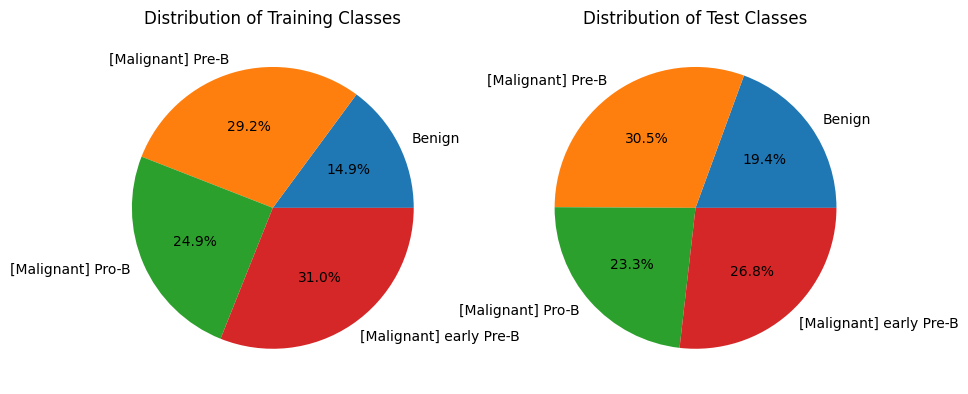

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.pie([y_train.tolist().count(i) for i in range(len(class_dict))],
       labels=[inv_class_dict[i] for i in range(len(class_dict))],
       autopct='%1.1f%%')
plt.title('Distribution of Training Classes')

plt.subplot(1,2,2)
plt.pie([y_test.tolist().count(i) for i in range(len(class_dict))],
       labels=[inv_class_dict[i] for i in range(len(class_dict))],
       autopct='%1.1f%%')
plt.title('Distribution of Test Classes')

plt.show()

## Data Augmentaion

In [ ]:
#General Augmentation:
datagen = ImageDataGenerator(
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill in missing pixels using the nearest available
)
datagen.fit(x_train)

augmented_images = []
augmented_labels = []

# Number of times to augment the data (in this case, we'll double the dataset)
augmentation_factor = 1


for x, y in datagen.flow(x_train, y_train, batch_size=len(x_train),shuffle = False):
    augmented_images.append(x)
    augmented_labels.append(y)

    if len(augmented_images) >= augmentation_factor:
        break

# Concatenate the augmented data batches
x_train = np.concatenate(augmented_images, axis=0)
y_train = np.concatenate(augmented_labels, axis=0)

# Verify the shape of augmented data
print("Shape of augmented images:", x_train.shape)
print("Shape of augmented labels:", y_train.shape)


Shape of augmented images: (2593, 224, 224, 3)
Shape of augmented labels: (2593,)


In [ ]:
y_train = to_categorical(y_train, num_classes=4 )
y_test = to_categorical(y_test, num_classes= 4)

In [ ]:
y_train.shape

(2593, 4)

# ResNet50

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
import numpy as np
import tensorflow as tf


# Model Input shape
INPUT_SHAPE = (224, 224, 3)
inp = layers.Input(shape=INPUT_SHAPE)

# Initialize the model
model = models.Sequential()

# Load the pre-trained ResNet50 model without the top layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=INPUT_SHAPE,
    pooling='max',
    classes = 14,
    weights='imagenet'
)

# Add the pre-trained model to the sequential model
model.add(pretrained_model)
model.add(Dropout(0.5))  # Dropout layer
model.add(Flatten())  # Flatten layer to feed into fully connected layers
model.add(Dense(512, activation='relu'))  # Fully connected layer
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer again
model.add(Dense(4, activation='softmax'))  # Output layer with dynamic number of classes

# Freeze the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Unfreeze the last few layers for fine-tuning
for layer in pretrained_model.layers[-12:]:
    layer.trainable = True

# Compile the model with the Adam optimizer
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,640,900 (94.00 MB)

 Trainable params: 5,517,828 (21.05 MB)

 Non-trainable params: 19,123,072 (72.95 MB)

None


In [ ]:
checkpoint_path = 'ResNet50.weights.h5'
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=True)

#Fit the model
history = model.fit(   x_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 10,
                         validation_data=(x_test, y_test),
                         shuffle = True,
                         callbacks=[checkpoint]
                     )

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7252 - loss: 0.8627
Epoch 1: val_accuracy improved from -inf to 0.85824, saving model to ResNet50.weights.h5
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 271ms/step - accuracy: 0.7267 - loss: 0.8578 - val_accuracy: 0.8582 - val_loss: 0.6655
Epoch 2/10
81/82 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9683 - loss: 0.1011
Epoch 2: val_accuracy improved from 0.85824 to 0.93220, saving model to ResNet50.weights.h5
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9683 - loss: 0.1007 - val_accuracy: 0.9322 - val_loss: 0.1987
Epoch 3/10
81/82 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9804 - loss: 0.0609
Epoch 3: val_accuracy improved from 0.93220 to 0.93991, saving model to ResNet50.weights.h5
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9804 - loss: 0.0607 - val_accuracy: 0.9399 - val_loss: 0.2755
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9855 - loss: 0.0340
Epoch 4: val_accuracy improved f

In [ ]:
model.load_weights(checkpoint_path)

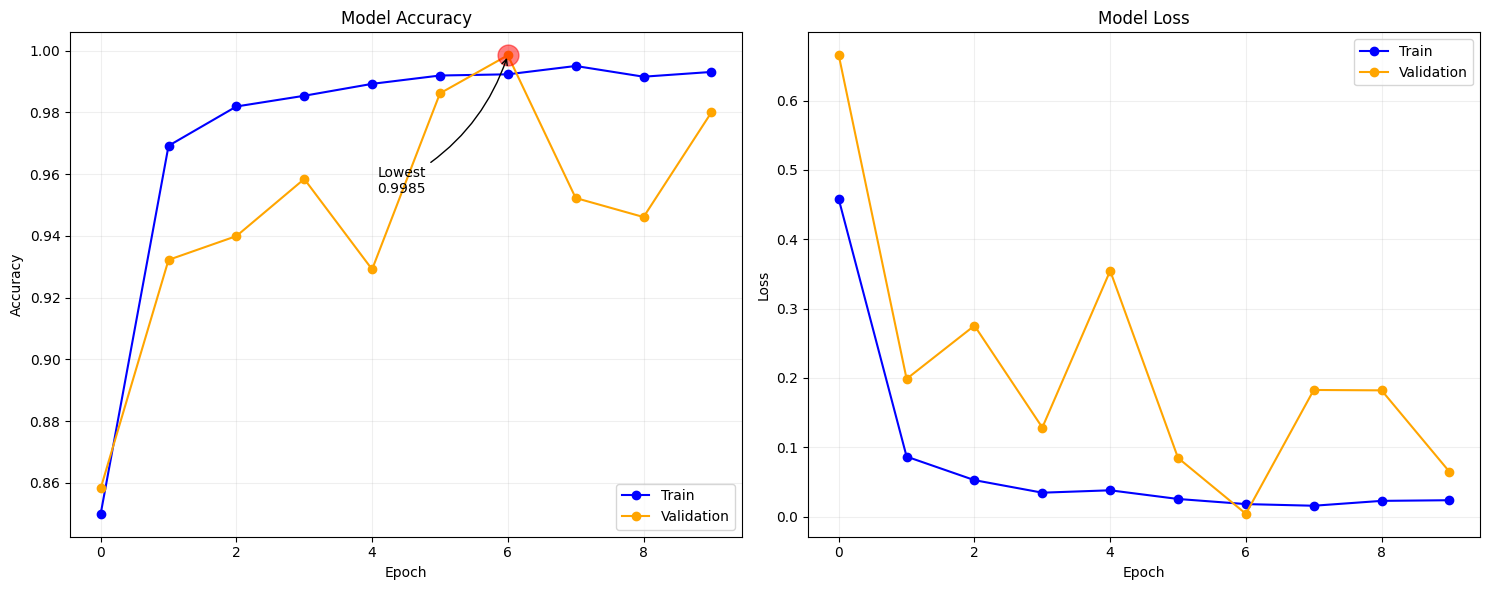

In [ ]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plotting training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'], marker='o', linestyle='-', color='blue')
ax[0].plot(history.history['val_accuracy'], marker='o', linestyle='-', color='orange')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='lower right')
ax[0].grid(alpha=0.2)

# Plotting training and validation loss over epochs
ax[1].plot(history.history['loss'], marker='o', linestyle='-', color='blue')
ax[1].plot(history.history['val_loss'], marker='o', linestyle='-', color='orange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper right')
ax[1].grid(alpha=0.2)

# Highlight lowest validation accuracy
min_val_acc_epoch = np.argmax(history.history['val_accuracy'])
min_val_acc = np.max(history.history['val_accuracy'])
ax[0].plot(min_val_acc_epoch, min_val_acc, 'ro', markersize=15, alpha=0.5)
ax[0].annotate(f'Lowest\n{min_val_acc:.4f}', xy=(min_val_acc_epoch, min_val_acc),

xytext=(min_val_acc_epoch - 100, min_val_acc - 100), textcoords='offset points',
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()


In [ ]:
actual_labels = []
predicted_labels = []

for img, label in zip(x_test, y_test):
    actual_labels.append(np.argmax(label))
    preds = model.predict(img.reshape((1, 224, 224, 3)))
    predicted_labels.append(np.argmax(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━

                         precision    recall  f1-score   support

                 Benign       1.00      0.99      1.00       126
      [Malignant] Pre-B       1.00      1.00      1.00       198
      [Malignant] Pro-B       1.00      1.00      1.00       151
[Malignant] early Pre-B       0.99      1.00      1.00       174

               accuracy                           1.00       649
              macro avg       1.00      1.00      1.00       649
           weighted avg       1.00      1.00      1.00       649



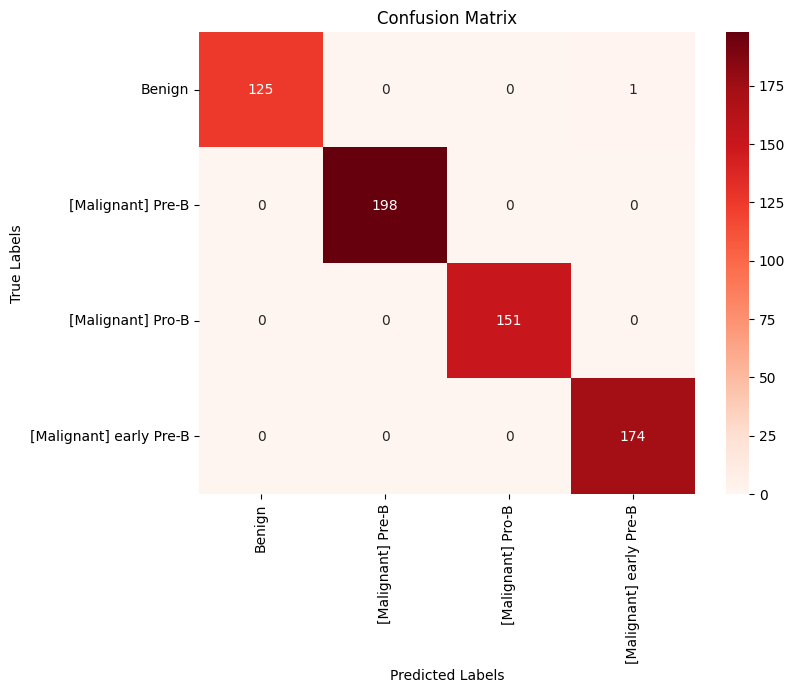

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class_names = list(class_dict.keys())
cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show

print(classification_report(actual_labels, predicted_labels, target_names= class_names))

In [ ]:
def viewing_predicted_img(model, x_test, y_test, num_img):

    num_cols = 3
    num_rows = (num_img + num_cols - 1) // num_cols  # Calculate rows dynamically based on columns

    # Dynamically adjust figure size
    plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Adjust the multiplier for spacing

    for i in range(num_img):
        plt.subplot(num_rows, num_cols, i + 1)
        random_num = np.random.randint(len(x_test))

        actual_label = np.argmax(y_test[random_num])
        pred = model.predict(x_test[random_num].reshape(1, 224, 224, 3))
        predicted_label = np.argmax(pred)

        plt.imshow(x_test[random_num])
        # Changed inv_label_dict to inv_class_dict
        plt.title(f"Actual: {inv_class_dict[actual_label]}\nPredicted: {inv_class_dict[predicted_label]}")
        plt.axis('off')

    # Show all the plots
    plt.tight_layout()
    plt.show()
viewing_predicted_img(model, x_test ,y_test,12)